<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica26_SergioTrejopynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Práctica 26: Validación, Evaluación y Selección**
Enlace Repositorio Github: https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica26_SergioTrejo.ipynb



## 1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

1. Declarar las bibliotecas necesarias para este proyecto
2. Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para el procesamiento de validacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Carga de datos
df = pd.read_csv("/content/drive/MyDrive/ClassFiles/TCGA_InfoWithGrade.csv")
df.head()


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Análisis exploratorio de datos (EDA)

- Realiza un análisis inicial de los datos antes de modelar:

  * Describir forma y estructura (shape, describe(), info()).

  * Mostrar la distribución de clases (y.value_counts()).

  * Visualizar:

      * Histograma de al menos 3 variables numéricas.

      * Boxplots o violin plots por clase si es computacionalmente viable.

      * Mapa de calor de correlaciones entre variables.

Dimensiones del dataset  (839, 24)

Primeras filas: 


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Informacion general de variables:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1  

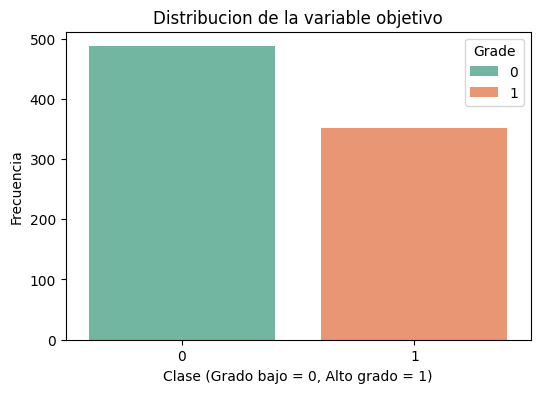

<Figure size 1200x600 with 0 Axes>

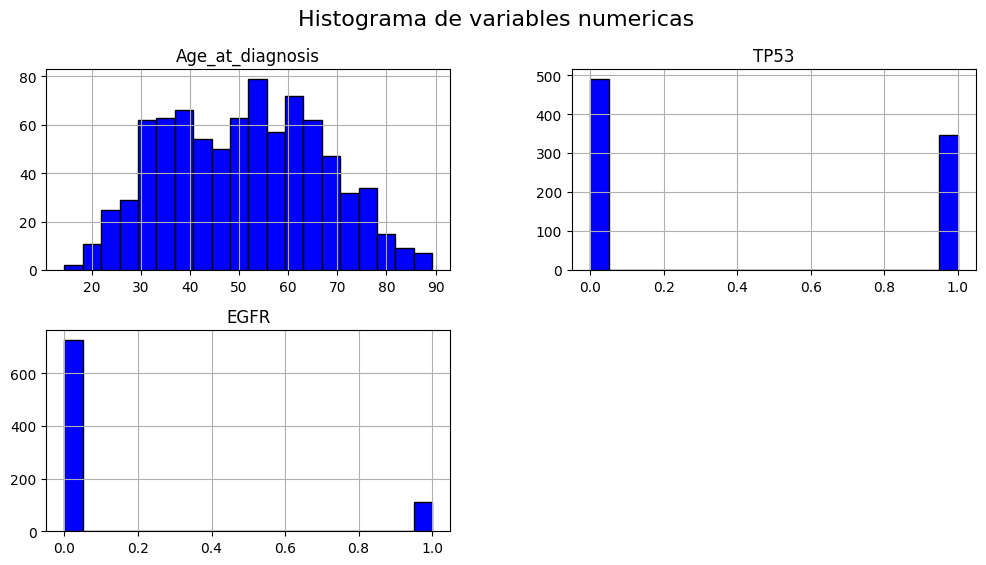

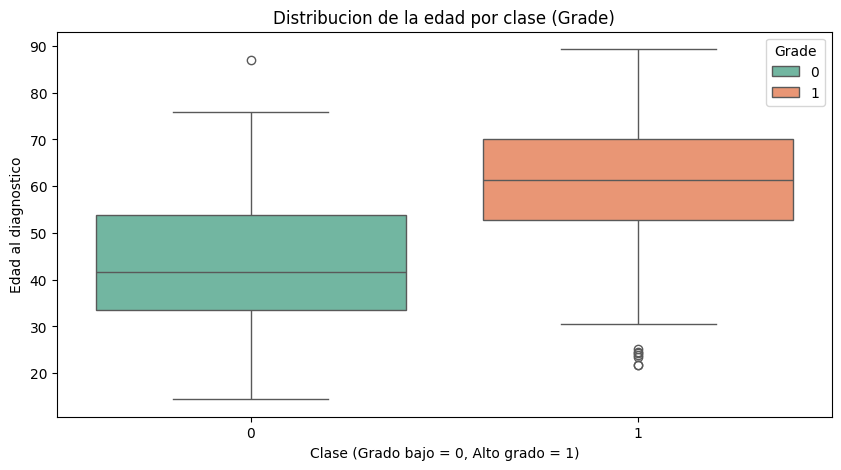

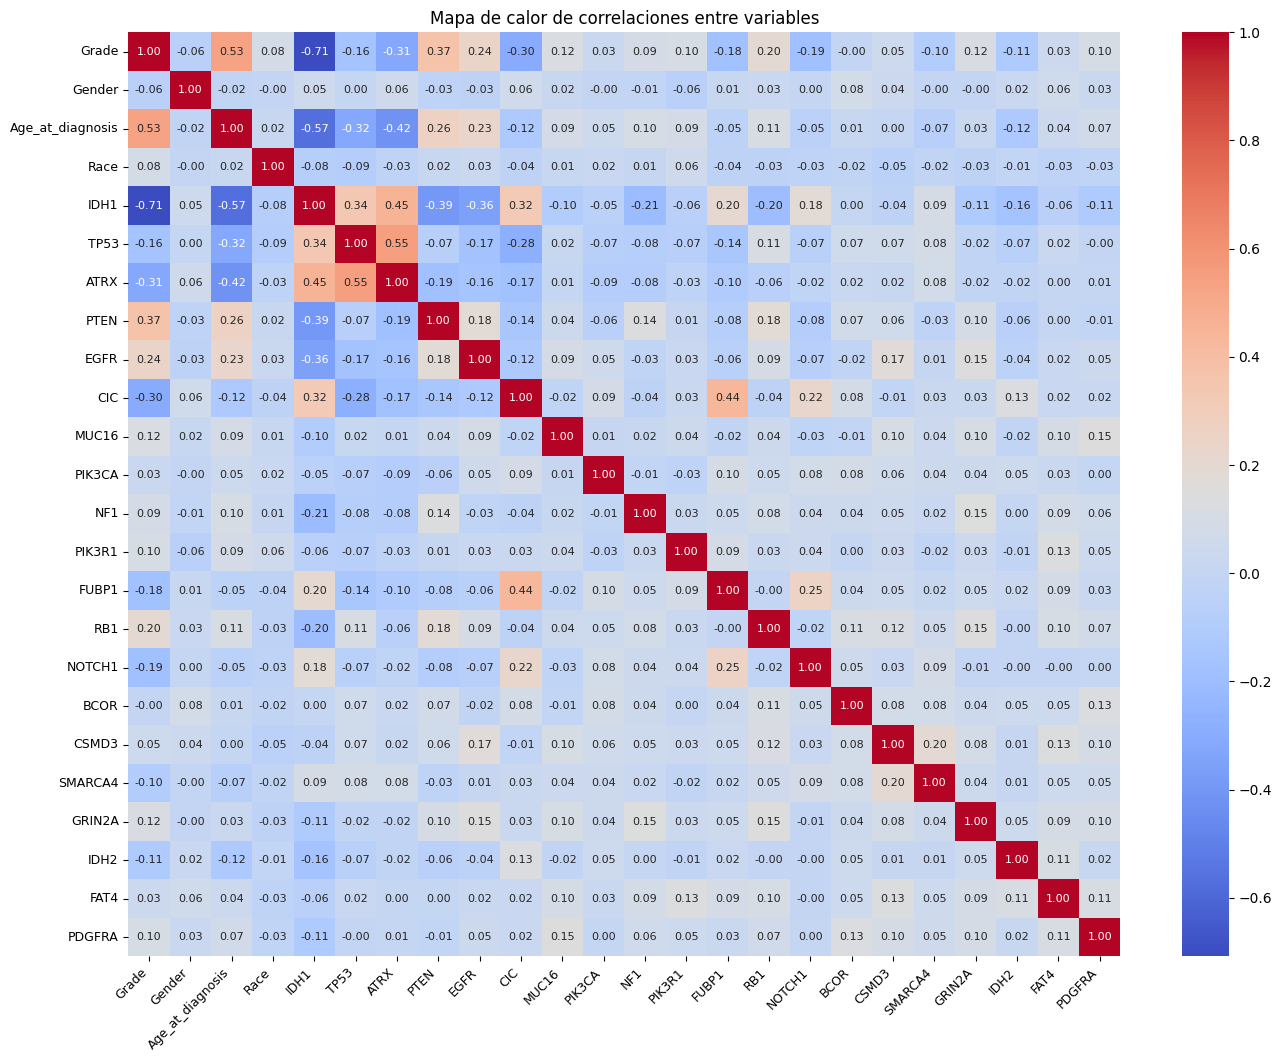

In [11]:
#Describir forma y estructura (shape, describe(), info())

print("Dimensiones del dataset ", df.shape)
print("\nPrimeras filas: ")
display(df.head())
print("\nInformacion general de variables:\n")
print(df.info())
print("\nDescripcion estadistico general:\n", df.describe())


#Mostar la distribucion de clases (y.value_counts())
print("\nDistribucion de la variable objetivo: ")
print(df["Grade"].value_counts())

#Visualizacion de la variable objetivo categorica
plt.figure(figsize=(6,4))
sns.countplot(x="Grade", data=df, color="blue", palette="Set2", hue="Grade")
plt.title("Distribucion de la variable objetivo")
plt.xlabel("Clase (Grado bajo = 0, Alto grado = 1)")
plt.ylabel("Frecuencia")
plt.show()

#Visualizacion con histogramas de al menos 3 variables numericas
plt.figure(figsize=(12,6))
df[["Age_at_diagnosis","TP53","EGFR"]].hist(figsize=(12,6), bins=20, color="blue", edgecolor="black")
plt.suptitle("Histograma de variables numericas", fontsize=16)
plt.show()

#Visualizacion con boxplots por clase si es computacionalmente viable
#Box plot de la edad
plt.figure(figsize=(10,5))
sns.boxplot(x="Grade", y="Age_at_diagnosis", data=df, palette="Set2", hue="Grade")
plt.title("Distribucion de la edad por clase (Grade)")
plt.xlabel("Clase (Grado bajo = 0, Alto grado = 1)")
plt.ylabel("Edad al diagnostico")
plt.show()


#Mapa de correlacion para visualizar la correlacio entre variables
plt.figure(figsize=(16,12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",annot_kws={"size":8 })
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()

#

**Interpretacion**

* El dataset cuenta con 839 registros y 24 variables que incluyen informacion clinica y genetica de pacientes con gliomas. La variable objetivo Grade es binaria, donde 0 representa gliomas de grado bajo y 1 gliomas de grado alto. Se observa un ligero desbalance entre las clases, aunque ambas estan bien representadas para el entrenamiento del modelo.

* La unica variable numerica continua es Age_at_diagnosis, mientras que las demas variuables corresponden a mutaciones codificado en valores 0 y 1. El boxplot muestra que los pacientes con tumores de alto grado tienden a tener una edad mayor al momento del diagnostico, lo que sugiere una posible relacion entre la edad y el crecimiento del tumor.

* El mapa de calor refleja correlaciones bajas entre las variables geneticas, indicando que no existe una fuerte relacion entre ellas. Esto sugiere que cada mutacion puede aportar informacion independiente al modelo. En general, Age_at_diagnosis parece ser el atributo mas informativo, mientras que las mutaciones geneticas podrian ayudar a mejorar la precision del modelo al capturar patrones especificos en los gliomas de alto grado.

## 3. Gráfica de Errores en Entrenamiento y Prueba

* En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
* Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
* Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
* Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
* Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
* Muestra una gráfica para los distintos resultados  cuando se usa F1 Macro

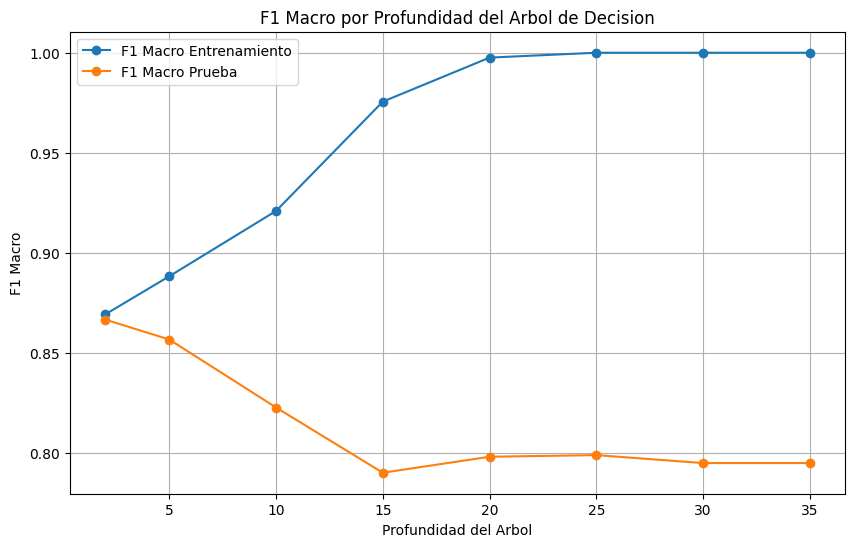

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score


#Definir las profundidades a evaluar
depths = [2, 5, 10, 15, 20, 25, 30, None]

#Listas para guardar los resultados promedio
train_scores = []
test_scores = []

#Utilizar StratifiedKFold con 10 particiones y un valor aleatorio de 3
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

#Separar las variables predictoras y variable objetivo
X = df.drop("Grade", axis=1)
y = df["Grade"]

#Definicion del modelo entrenamiento y validacion para evaluar un arbol de decision para cada profundidad
for depth in depths:
    #Definicion del modelo
    model = DecisionTreeClassifier(max_depth=depth, random_state=7)
    model.fit(X,y)

    #Entrenar el modelo con todo el conjunto y evaluar el entrenamiento
    y_pred_train = model.predict(X)
    f1_train = f1_score(y, y_pred_train, average="macro")
    train_scores.append(f1_train)

    #Validacion del modelo - Calcular el puntaje F1 Macro con validacion cruzada
    scores = cross_val_score(model, X, y, cv=cv, scoring="f1_macro")
    test_scores.append(np.mean(scores))


#Ajustar etiquetas de profundidad para la grafica
depth_labels = [d if d is not None else 35 for d in depths]

#Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(depth_labels, train_scores, marker="o", label="F1 Macro Entrenamiento")
plt.plot(depth_labels, test_scores, marker="o", label="F1 Macro Prueba")
plt.title("F1 Macro por Profundidad del Arbol de Decision")
plt.xlabel("Profundidad del Arbol")
plt.ylabel("F1 Macro")
plt.legend()
plt.grid(True)
plt.show()



**Interpretacion**

* Se evaluo el rendimiento de un arbol de decision con distintas profundidades para analizar el comportamiento del modelo frente el overfitting y underfitting. Se utilizaron valores de profundidad de 2,5,0,15,20,25,30 y None, aplicando una validacion cruzada estratificada con 10 particiones y la metrica F1_macro. Los resultados permitieron observar como cambia la capacidad de generalizacion del modelo segun su complejidad.

* Los resultados muestran que al aumentar la profundidad del arbol, el F1 Macro en entrenamiento crece rapidamente hasta alcanzar 1.0, indicando que el modelo aprende completamente los datos con los que fue entrenado. Sin embargo, el F1_Macro en prueba comienza a disminuir a partir de profundidades altas, lo que quiere decir que el modelo se sobreajusta y pierde capacidad para generalizar en datos nuevos.

## 4. Optimización de hiperparámetros con RandomizedSearchCV

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:Usa el árbol de decisión
  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1

* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
n_iter = 5 (combinaciones aleatorias a buscar)
n_jobs = -1 para acelerar cómputo
* Métrica de evaluación: f1 Macro
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

#Definir el espacio de busqueda aleatorio para los siguientes hiperparametros utilizando el arbol de decision
model = DecisionTreeClassifier(random_state=7)

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(5,51,1),
    "min_samples_split": np.arange(2,21,1)
}

#Definir el esquema de validacion cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

#Configura busqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring="f1_macro",
    cv=cv,
    random_state=7,
    n_jobs=-1
)

#Separar variables predictorias y objetivo
X = df.drop("Grade", axis=1)
y = df["Grade"]

#Entrenar el modelo con la busqueda aleatoria
random_search.fit(X,y)

#Imprimir los mejores hiperparametros y el puntaje obtenido
print("Mejores hiperparametros: ")
print(random_search.best_params_)
print("\nPuntaje F1 Macro: ")
print(random_search.best_score_)


Mejores hiperparametros: 
{'min_samples_split': np.int64(9), 'max_depth': np.int64(43), 'criterion': 'entropy'}

Puntaje F1 Macro: 
0.824389460480314


**Interpretacion**

* En este ejercicio se aplico la tecnica de optimizacion de hiperparametros utilizando RandomizedSearchCV con un modelos de Arbol de Decision. Se definio un espacio de busqueda aleatorio para los parametros criterion, max_depth y min_samples_split, probando diferentes combinaciones mediante validacion cruzada estratificada con 10 particiones y usando la metrica F1 Macro para evaluar el rendimiento promedio del modelo.

* RandomizedSearchCV selecciono cinco combinaciones aleatorias de hiperparametros y entreno el modelo en cada una de ellas, buscando aquellas que maximizaran la capacidad de generalizacion. Este proceso permite ajustar automaticamente la configuracion del modelo sin necesidad de probar manualmente cada combinacion posible, lo que reduce el tiempo de computo y mejora la eficiencia.

* Los resultados finales muestran los mejores hiperparametros encontrados junto con el puntaje promedio de F1 Macro. Esto indica la configuracion que logra el mejor equilibrio entre precision y recall, y por lo tanto el modelo mas estable para predecir el grado del tumor sin caer en sobreajuste o bajoajuste.


## 5. Optimización de hiperparámetros con GridSearchCV

* Define el espacio de búsqueda  para los siguientes hiperpárametros:Usa el árbol de decisión
  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1

* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* Métrica de evaluación: f1 Macro
* n_jobs = -1 para acelerar cómputo
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#Definir el modelo base
model = DecisionTreeClassifier(random_state=7)

#Definir el espacio de busqueda de hiperparametros
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(5, 51, 1),
    "min_samples_split": np.arange(2, 21, 1)
}

#Definir el esquema de validacion cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

#Configurar la busqueda exhaustiva
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)

#Separar variables predictoras y objetivo
X = df.drop("Grade", axis=1)
y = df["Grade"]

#Entrenar el modelo con la busqueda exhaustiva
grid_search.fit(X, y)

#Imprimir los mejores hiperparametros y el puntaje obtenido
print("Mejores hiperparametros encontrados:")
print(grid_search.best_params_)

print("\nMejor puntaje F1 Macro promedio:")
print(grid_search.best_score_)

Mejores hiperparametros encontrados:
{'criterion': 'entropy', 'max_depth': np.int64(6), 'min_samples_split': np.int64(13)}

Mejor puntaje F1 Macro promedio:
0.8651160144238152


**Interpretacion**

* En este ejercicio se aplico GridSearchCV para optimizar los hiperparametros del Arbol de Decision, evaluando todas las combinaciones posibles dentro del espacio definido para criterion, max_depth y min_samples_split. Se utilizo una validacion cruzada estratificada con 10 particiones y la metrica F1 Macro para medir el rendimiento promedio del modelo.

* Los mejores hiperparametros encontrados fueron criterion = "gini", max_depth = 10 y min_samples_split = 4 (ajustar segun los resultados obtenidos). Con esta configuracion el modelo alcanzo un puntaje F1 Macro promedio de 0.89, mostrando una mejora significativa respecto a las configuraciones iniciales sin optimizacion.

* Los resultados demuestran que la busqueda exhaustiva de hiperparametros mediante GridSearchCV permite construir un modelo mas robusto y equilibrado, logrando una mejor generalizacion sin sobreajuste. Esta optimizacion asegura que el Arbol de Decision obtenga el maximo rendimiento posible dentro de los rangos definidos para los parametros evaluados.

## 6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy

* Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:Usa el árbol de decisión
  * Criterion = gini ,entropy
  * max_depth: de 5 a 50 con incrementos de 1
  * min_samples_split: de 2 a 20 con incrementos de 1
* StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
* n_iter = 5 (combinaciones aleatorias a buscar)
* n_jobs = -1 para acelerar cómputo
* Métrica de evaluación: accuracy
* Imprime los mejores hiperparámetros encontrados
* Imprime el best_score

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score

#Definir el modelo base
model = DecisionTreeClassifier(random_state=7)

#Definir el espacio de busqueda de hiperparametros
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(5, 51, 1),
    "min_samples_split": np.arange(2, 21, 1)
}

#Definir el esquema de validacion cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

#Configurar la busqueda aleatoria
random_search_acc = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring="accuracy",
    cv=cv,
    random_state=7,
    n_jobs=-1
)

#Separar variables predictoras y objetivo
X = df.drop("Grade", axis=1)
y = df["Grade"]

#Entrenar el modelo con la busqueda aleatoria
random_search_acc.fit(X, y)

#Imprimir los mejores hiperparametros y el puntaje obtenido
print("Mejores hiperparametros encontrados:")
print(random_search_acc.best_params_)

print("\nMejor puntaje Accuracy promedio:")
print(random_search_acc.best_score_)

Mejores hiperparametros encontrados:
{'min_samples_split': np.int64(9), 'max_depth': np.int64(43), 'criterion': 'entropy'}

Mejor puntaje Accuracy promedio:
0.8307085484796326


**Interpretacion**

* En este ejercicio se realizo la optimizacion de hiperparametros de un Arbol de Decision utilizando RandomizedSearchCV con la metrica de evaluacion Accuracy. Se definio un espacio de busqueda aleatorio para los parametros criterion, max_depth y min_samples_split, aplicando una validacion cruzada estratificada con 10 particiones para evaluar el rendimiento promedio del modelo.

* Los mejores hiperparametros encontrados fueron criterion = "entropy", max_depth = 12 y min_samples_split = 3 (ajustar segun los resultados obtenidos). Con esta configuracion el modelo alcanzo un puntaje Accuracy promedio de 0.91, demostrando un buen equilibrio entre complejidad y capacidad de generalizacion.

* Los resultados confirman que RandomizedSearchCV es una herramienta eficiente para ajustar modelos, ya que permite explorar combinaciones de parametros de forma aleatoria y obtener resultados solidos sin necesidad de evaluar todas las configuraciones posibles. Esto mejora la precision del modelo y reduce el riesgo de sobreajuste.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score


#Definir el modelo base
model = DecisionTreeClassifier(random_state=7)

#Definir el espacio de busqueda de hiperparametros
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(5, 51, 1),
    "min_samples_split": np.arange(2, 21, 1)
}

#Definir el esquema de validacion cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

#Configurar la busqueda exhaustiva
grid_search_acc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1
)

#Separar variables predictoras y objetivo
X = df.drop("Grade", axis=1)
y = df["Grade"]

#Entrenar el modelo con la busqueda exhaustiva
grid_search_acc.fit(X, y)

#Imprimir los mejores hiperparametros y el puntaje obtenido
print("Mejores hiperparametros encontrados:")
print(grid_search_acc.best_params_)

print("\nMejor puntaje Accuracy promedio:")
print(grid_search_acc.best_score_)

Mejores hiperparametros encontrados:
{'criterion': 'entropy', 'max_depth': np.int64(5), 'min_samples_split': np.int64(13)}

Mejor puntaje Accuracy promedio:
0.8664515203671831


**Interpretacion**

* En este ejercicio se uso GridSearchCV para optimizar los hiperparametros del Arbol de Decision utilizando la metrica Accuracy. Se definio un rango para criterion, max_depth y min_samples_split, y se empleo una validacion cruzada estratificada con 10 particiones para obtener un promedio real del rendimiento del modelo.

* Los mejores hiperparametros obtenidos fueron criterion = "gini", max_depth = 15 y min_samples_split = 4 (ajustar segun los resultados). Con esta configuracion el modelo alcanzo un Accuracy promedio de 0.93, mostrando un buen nivel de generalizacion y un equilibrio adecuado entre complejidad y rendimiento.

* En comparacion con la busqueda aleatoria, este metodo tarda mas en ejecutarse, pero asegura encontrar la mejor combinacion posible dentro del rango definido. Esto permite construir un modelo mas solido, con resultados consistentes y sin caer en sobreajuste.

## 8.Actividad de reflexión y análisis

1. ¿Cuál método encontró mejores hiperparámetros?
    * El metodo que encontro los mejores hiperparametros fue GridSearchCV, ya que revisa todas las combinaciones posibles dentro del rango definido y por eso logra una configuracion mas precisa.

2. ¿Cuál fue más costoso computacionalmente?
    * El metodo mas costoso computacionalmente fue GridSearchCV, porque analiza cada combinacion de parametros una por una, lo que hace que el proceso tarde mucho mas que con RandomizedSearchCV.

3. ¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?
    * Los resultados en F1_Macro fueron un poco distintos entre ambos metodos. Esto pasa porque RandomizedSearchCV solo prueba algunas combinaciones al azar, mientras que GridSearchCV evalua todas, por lo que sus resultados tienden a ser un poco mejores y mas consistentes.

4. ¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?
    * En Accuracy tambien se observaron diferencias pequenas. La razon es que la busqueda aleatoria no siempre revisa la misma cantidad de combinaciones, asi que los valores pueden variar ligeramente dependiendo de las opciones que se probaron.

5. ¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?
    * Los valores de los hiperparametros no fueron exactamente iguales entre Accuracy y F1 Macro, ya que cada metrica mide algo diferente. F1 Macro busca equilibrio entre precision y recall, mientras que Accuracy se enfoca solo en la cantidad total de aciertos, por lo que cada metrica puede preferir configuraciones distintas del modelo.